# ECE 276 Project 2: LiDAR based SLAM

1. load data

In [1]:
# !pip install open3d matplotlib numpy

import numpy as np
import matplotlib.pyplot as plt; plt.ion()
import time
import os
import scipy.io as sio
import open3d as o3d
import gtsam

from icp_warm_up.utils import read_canonical_model, load_pc, visualize_icp_result
import pr2_utils as U
from load_data import load_dataset


print("done")


done


encoder stamps size 4956
imu stamps size 12187


time range 1298445274.823653 to  1298445396.755451


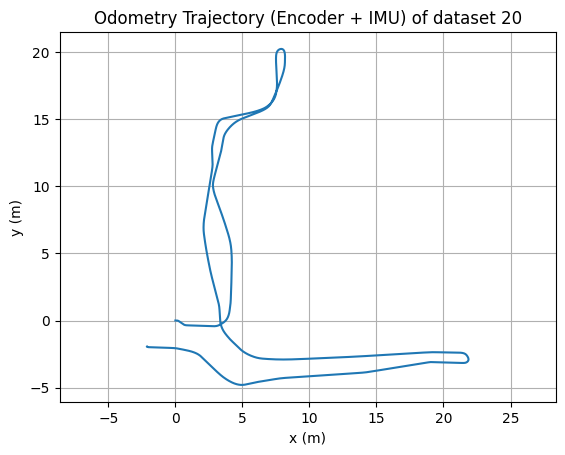

encoder stamps size 4789
imu stamps size 11730


time range 1298881995.438197 to  1298882112.795965


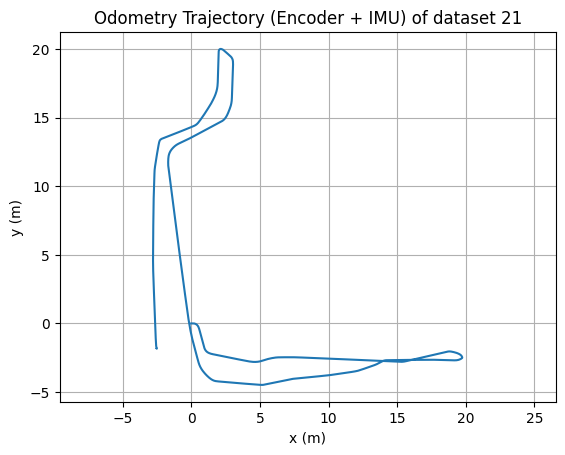

In [2]:
_ = U.encoder_IMU_odometry(20)
_ = U.encoder_IMU_odometry(21)

encoder stamps size 4956
imu stamps size 12187


time range 1298445274.823653 to  1298445396.755451


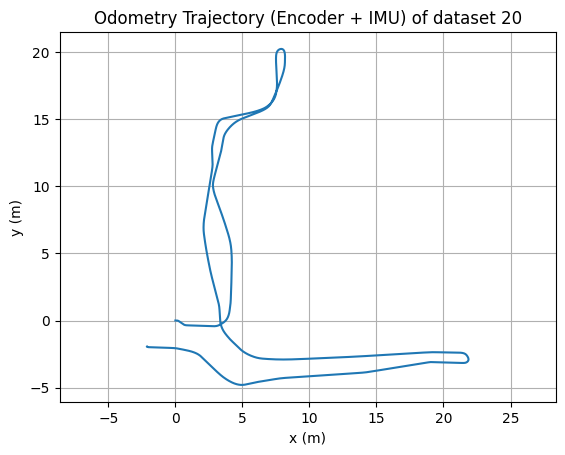

1081
lidar_ranges shape: (1081, 4962)


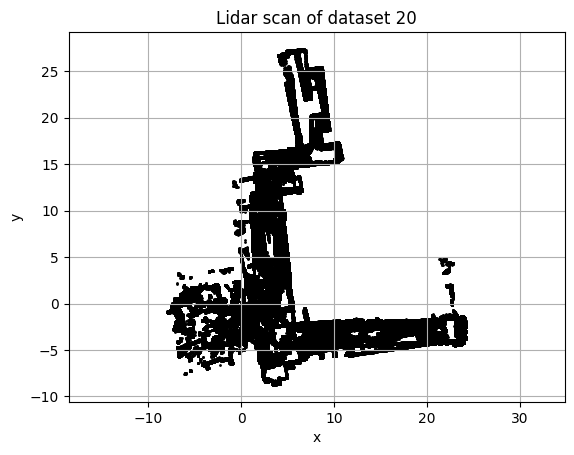

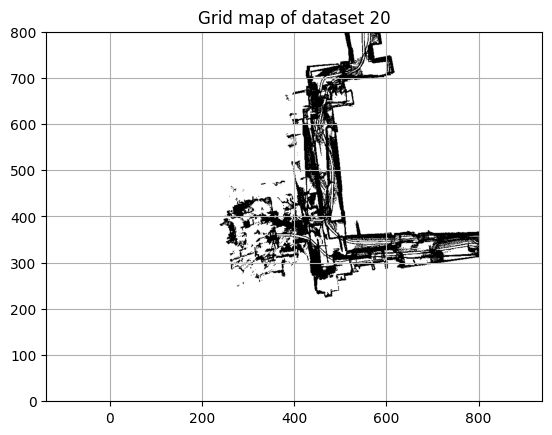

encoder stamps size 4789
imu stamps size 11730


time range 1298881995.438197 to  1298882112.795965


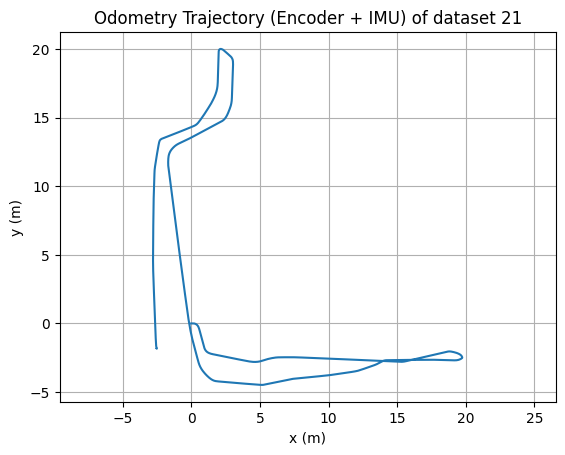

1081
lidar_ranges shape: (1081, 4785)


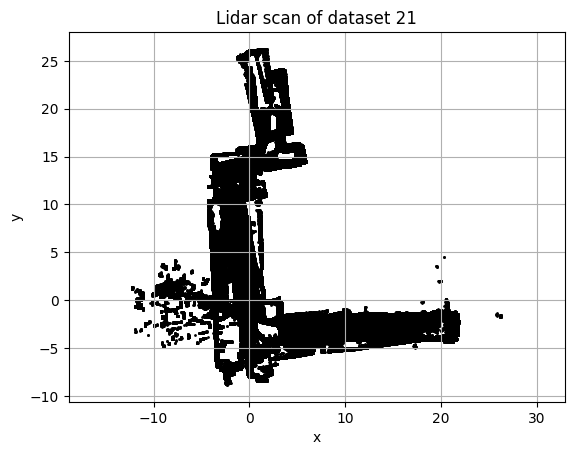

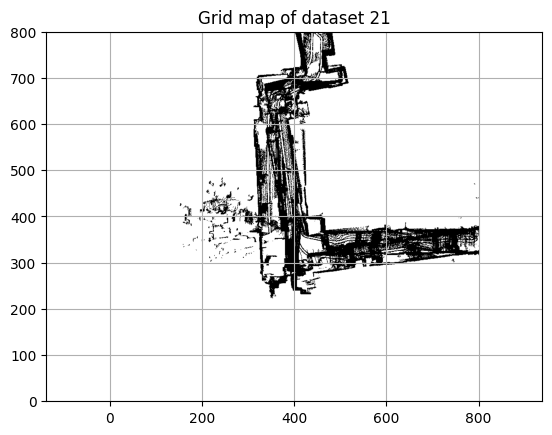

In [3]:
_ = U.test_map(dataset=20)
_ = U.test_map(dataset=21)

# 2. Point-cloud registration via iterative closest point (ICP):

In [4]:
# # Warm up
# # Drill
# Z, M, pose, mse, R, p, yaw  = U.warmup_icp("drill", 0, yaw_steps=36)

# print("\n Drill Best yaw: ", yaw, "\nDrill Best MSE: ", mse)
# visualize_icp_result(Z, M, pose)

# # Liquid Container
# Z, M, pose, mse, R, p, yaw  = U.warmup_icp("liq_container", 0, yaw_steps=36)

# print("\nliq_container Best yaw: ", yaw, "\nliq_container Best MSE: ", mse)
# visualize_icp_result(Z, M, pose)

encoder stamps size 4956
imu stamps size 12187


time range 1298445274.823653 to  1298445396.755451


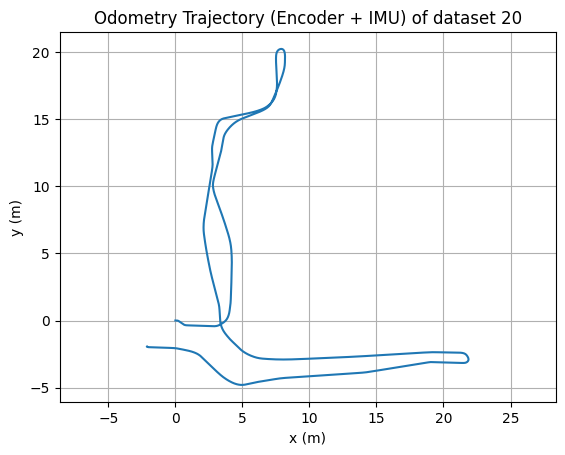

1081
lidar_ranges shape: (1081, 4962)


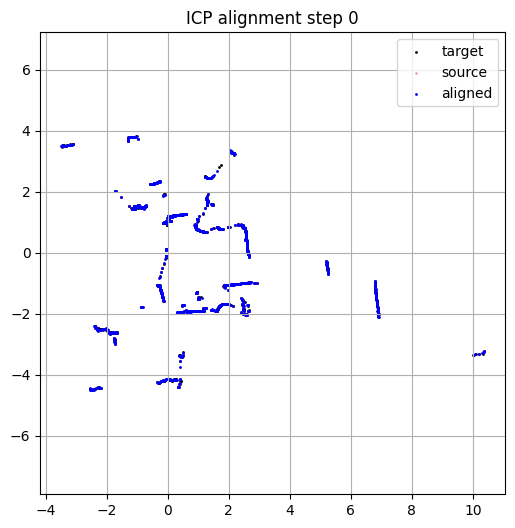

0 MSE: 0.000177819789001084


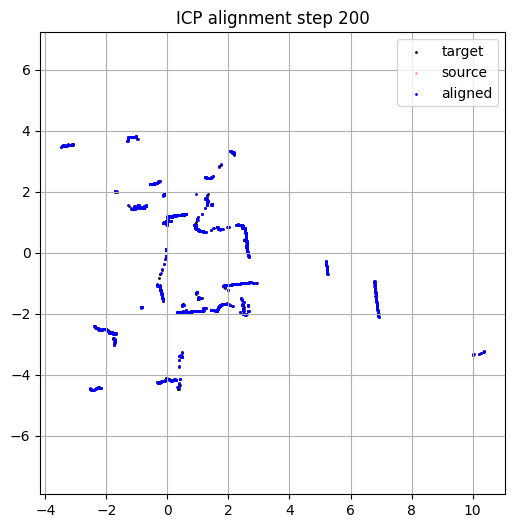

200 MSE: 0.00019979190570862425


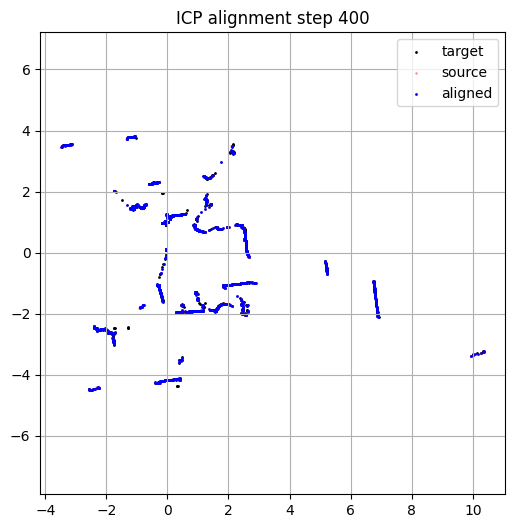

400 MSE: 0.0004245122902184677


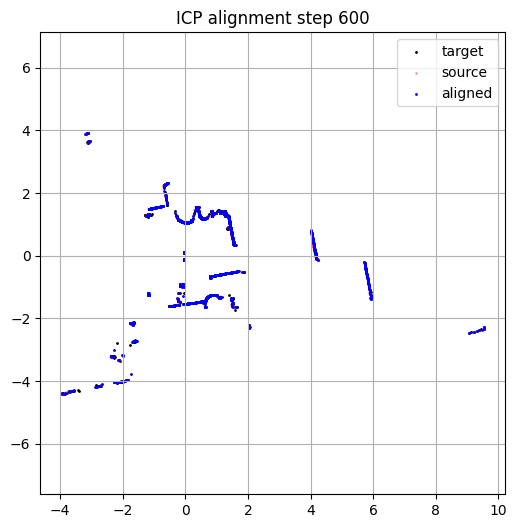

600 MSE: 0.0003270833197123676


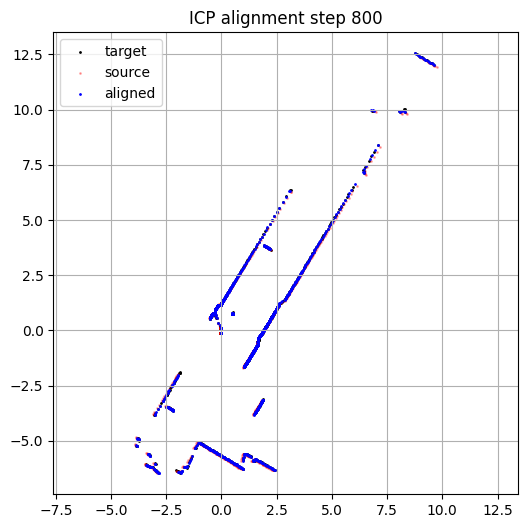

800 MSE: 0.00024521508434068105


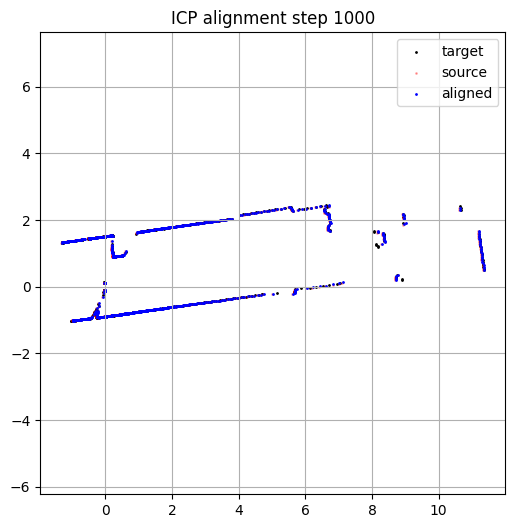

1000 MSE: 0.0002480078445618415


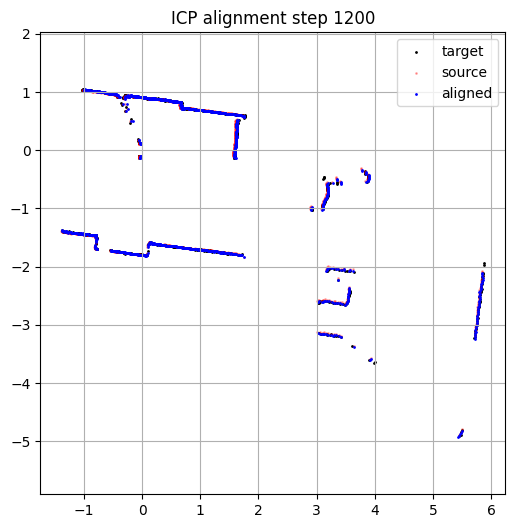

1200 MSE: 0.00011322249794562827


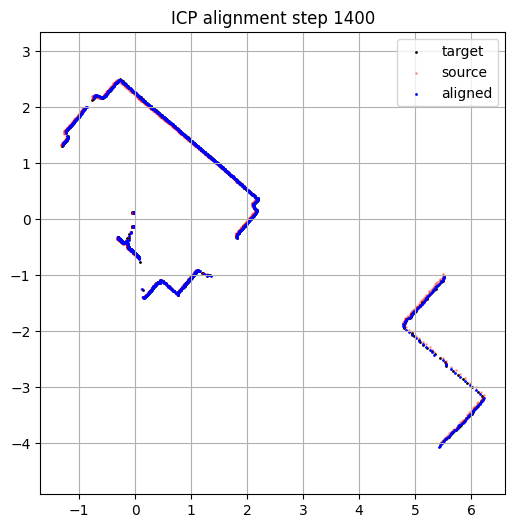

1400 MSE: 0.00010469981694980539


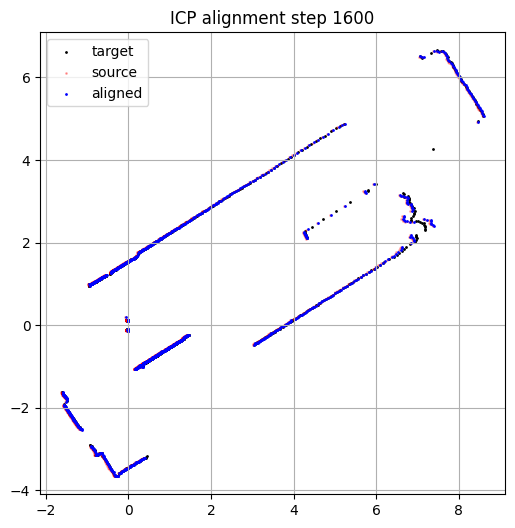

1600 MSE: 0.000682041514673157


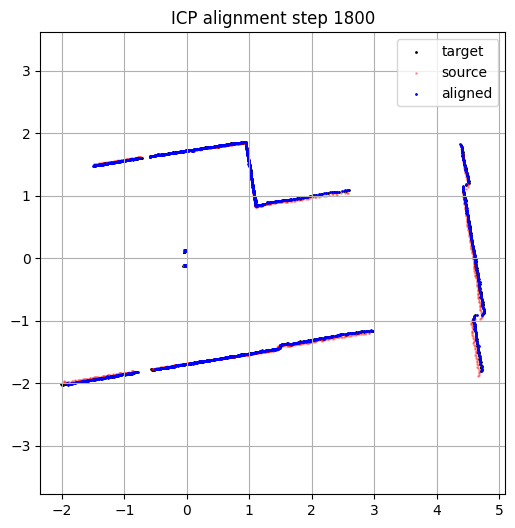

1800 MSE: 8.099322154083733e-05


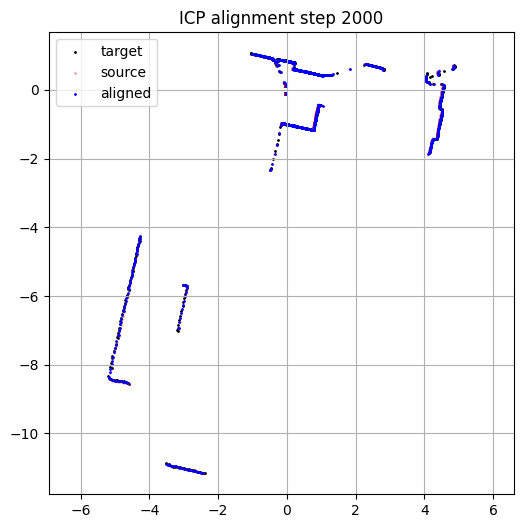

2000 MSE: 0.0003998655575911744


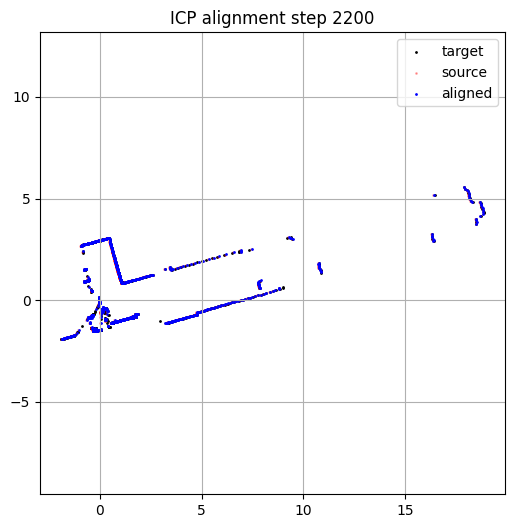

2200 MSE: 0.0006349522327845429


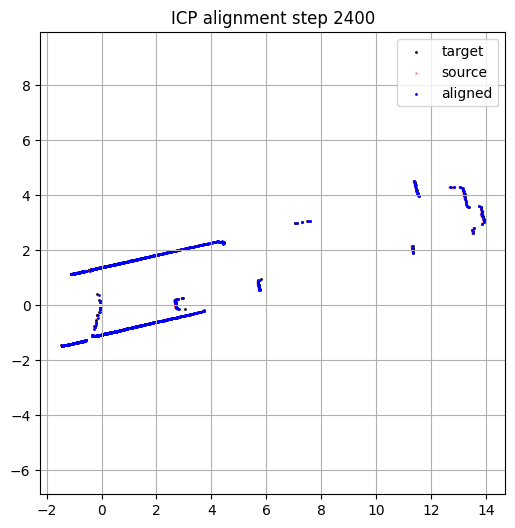

2400 MSE: 0.00013205864380698204


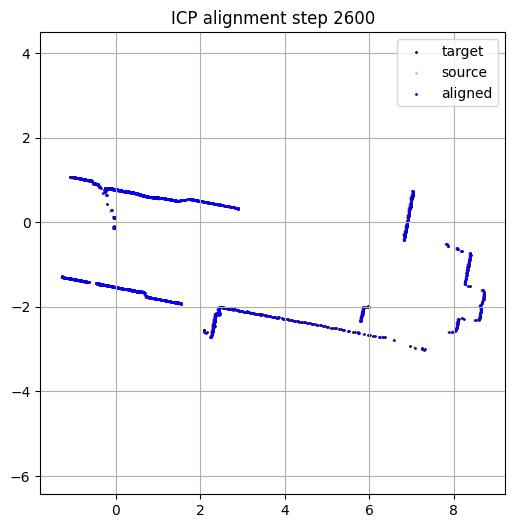

2600 MSE: 0.00025232862866592


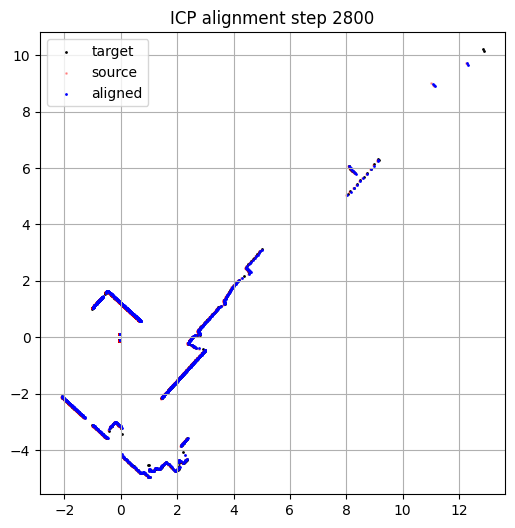

2800 MSE: 0.014084202040687494


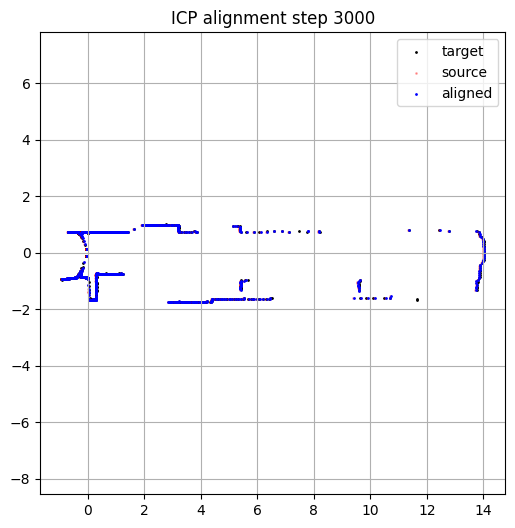

3000 MSE: 0.00021280014837719106


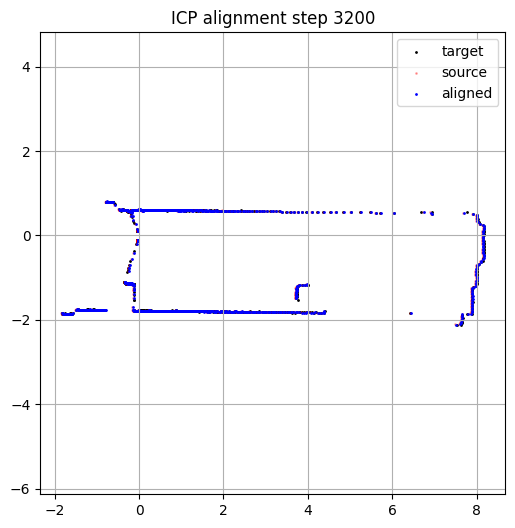

3200 MSE: 0.00012186410546114795


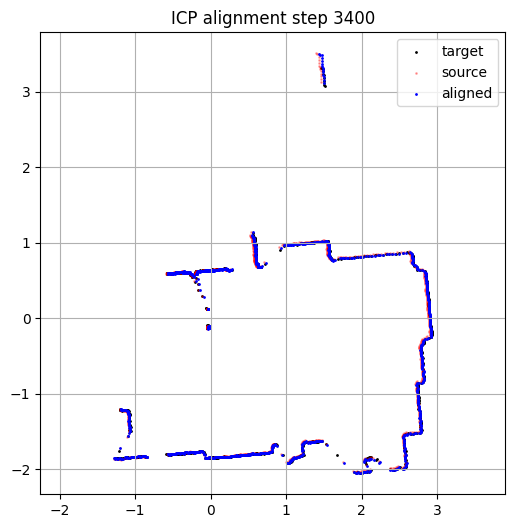

3400 MSE: 0.00020687861597867122


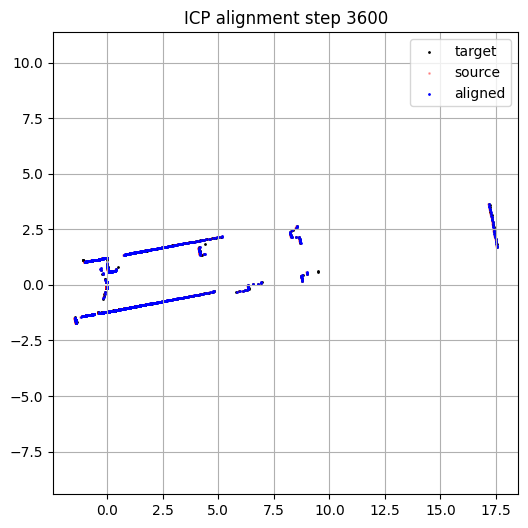

3600 MSE: 0.00015118227773590337


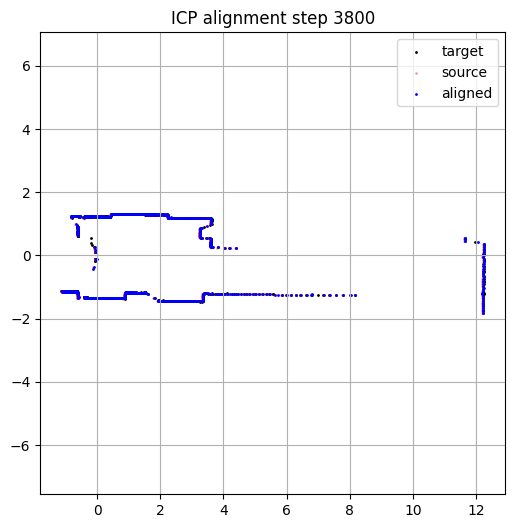

3800 MSE: 0.0002190847166723565


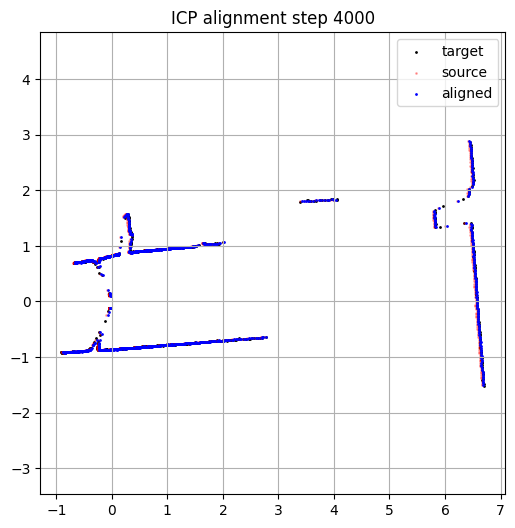

4000 MSE: 0.00014410442002697779


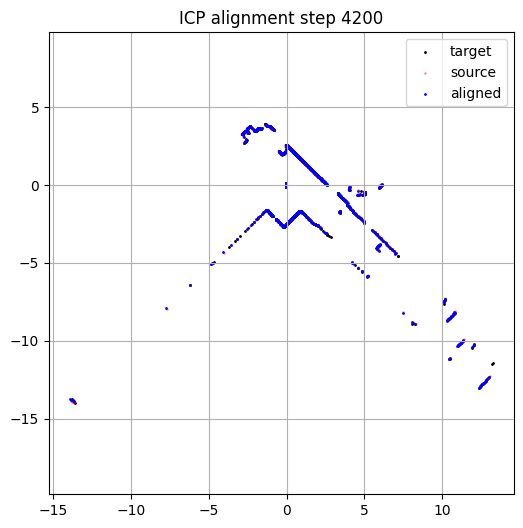

4200 MSE: 0.006755412785810458


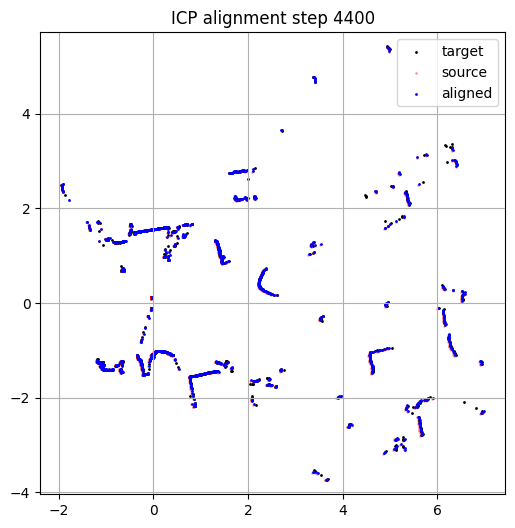

4400 MSE: 0.0008588427806300684


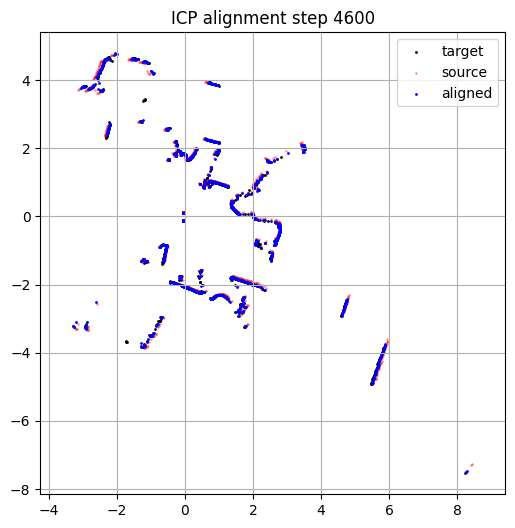

4600 MSE: 0.0014789946086602233


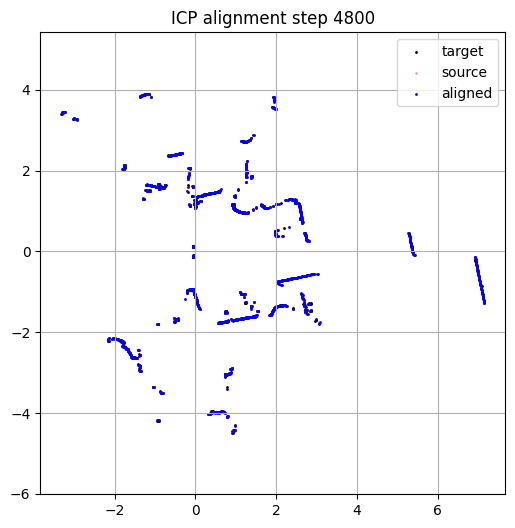

4800 MSE: 0.00019975349798736838
mean mse: 0.0013057430962937903 max mse: 0.3338228616949221


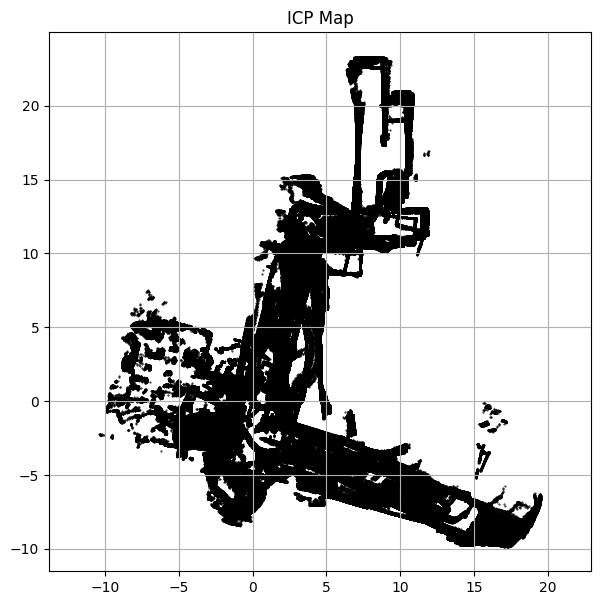

encoder stamps size 4956
imu stamps size 12187


time range 1298445274.823653 to  1298445396.755451


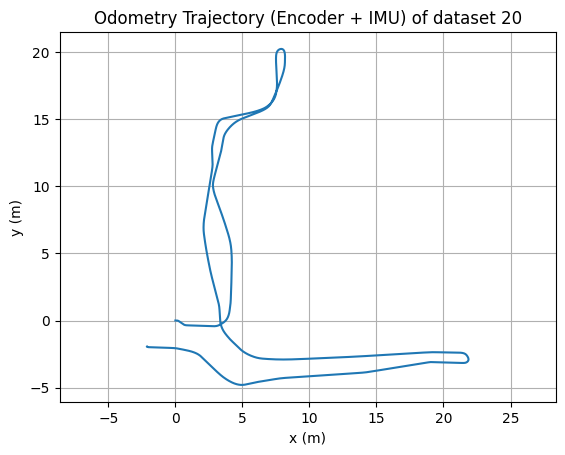

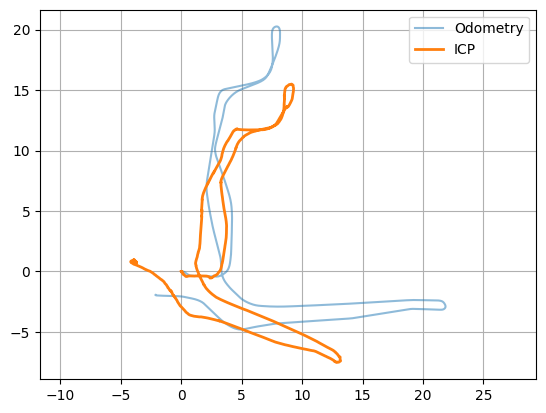

In [5]:
dataset = 20
R_list, p_list, mse_list, x_icp, y_icp  = U.ICP_dataset(dataset)
encoder_data, lidar_data, imu_data, _ = load_dataset(dataset)
_, _, _, encoder_t, _, _, _, x, y, theta, _, _, _ = U.encoder_IMU_odometry(dataset)

plt.figure()
plt.plot(x, y, label="Odometry", alpha=0.5)
plt.plot(x_icp, y_icp, label="ICP", linewidth=2)
plt.axis("equal"); plt.grid(True); plt.legend()
plt.show()


# i = 100
# lidar_ranges = lidar_data["lidar_ranges"]
# lidar_stamps = lidar_data["lidar_stamps"]
# angle_min = lidar_data["lidar_angle_min"]
# angle_increment = lidar_data["lidar_angle_increment"]
# range_min = lidar_data["lidar_range_min"]
# range_max = lidar_data["lidar_range_max"]

# n_rays = lidar_ranges.shape[0]
# angles = angle_min + np.arange(n_rays) * angle_increment

# Q = U.lidar_scan_to_points(lidar_ranges[:, i], angles, range_min, range_max)
# P = U.lidar_scan_to_points(lidar_ranges[:, i+1], angles, range_min, range_max)

# j0 = np.argmin(np.abs(encoder_t - lidar_stamps[i]))
# j1 = np.argmin(np.abs(encoder_t - lidar_stamps[i+1]))
# dx, dy = x[j1]-x[j0], y[j1]-y[j0]
# dtheta = theta[j1]-theta[j0]

# R_init = U.rotation2d(dtheta)
# p_init = np.array([[dx],[dy]])

# R_icp, p_icp, mse = U.ICP(P, Q, R_init, p_init)
# print("mse:", mse)